In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, classification_report

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Cleaned.csv")

In [4]:
df_reduced = df.drop(columns=['race_3', 'CSMD3', 'FAT4', 'BCOR', 'race_2', 'SMARCA4', 'PDGFRA', 'GRIN2A', 'PIK3R1', 'PIK3CA', 'race_1', 'NOTCH1', 'Gender', 'race_0'])

In [42]:
df_reduced

,Grade,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,NF1,FUBP1,RB1,IDH2,z_ages_at_diagnosis
0,0,1,0,0,0,0,0,0,0,1,0,0,0.022035
1,0,1,0,0,0,0,1,0,0,0,0,0,-0.779602
2,0,1,1,1,0,0,0,0,0,0,0,0,-1.005819
3,0,1,1,1,0,0,0,1,0,0,0,0,-1.158117
4,0,1,1,1,0,0,0,0,0,0,0,0,-1.239046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,1,0,0,0,1,0,0,0,0,0,0,0,1.716432
834,1,0,1,0,1,0,0,0,0,0,0,0,2.180974
835,1,0,1,0,1,0,0,0,0,0,0,0,1.690943
836,1,0,1,0,0,0,0,1,0,0,1,0,0.788624


## KNN

In [60]:
X = np.array(df_reduced.drop(['Grade'], 1))
y = np.array(df_reduced['Grade'])


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0)

# Define the parameter grid for grid search
param_grid = {'n_neighbors': range(1, 15),
              'p': [1, 2, 3]}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
knn_best_params = grid_search.best_params_
knn_best_score = grid_search.best_score_

print("Best Hyperparameters:", knn_best_params)
print("Best Score:", knn_best_score)

# Fit the model with the best hyperparameters using the combined training and validation sets
best_knn = KNeighborsClassifier(**knn_best_params)
best_knn.fit(np.vstack((X_train, X_val)), np.concatenate((y_train, y_val)))

# Evaluate the model on the test set
test_accuracy = best_knn.score(X_test, y_test)

print("Test Accuracy:", test_accuracy)

C:\Users\ajed8\AppData\Local\Temp\ipykernel_18936\3423675485.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_reduced.drop(['Grade'], 1))


Best Hyperparameters: {'n_neighbors': 9, 'p': 1}
Best Score: 0.8556294326241135
Test Accuracy: 0.8904761904761904


C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


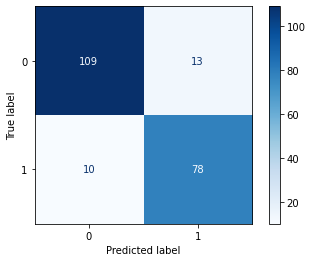

In [19]:
plot_confusion_matrix(best_knn, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [63]:
model=best_knn
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

0.861878453038674
              precision    recall  f1-score   support

           0      0.915     0.877     0.895       122
           1      0.839     0.886     0.862        88

    accuracy                          0.881       210
   macro avg      0.877     0.882     0.879       210
weighted avg      0.883     0.881     0.881       210



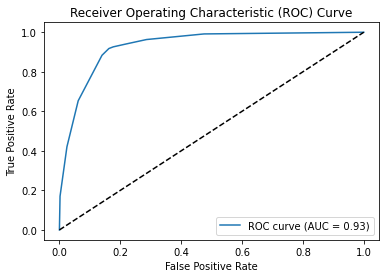

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = best_knn.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [74]:
auc

0.930976430976431

## Logistic Regression

Best Hyperparameters: {'C': 100}
Best Score: 0.8492464539007093


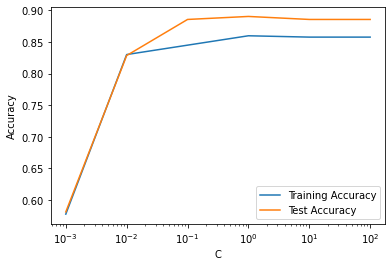

In [6]:
# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Create the Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
lr_best_params = grid_search.best_params_
lr_best_score = grid_search.best_score_

print("Best Hyperparameters:", lr_best_params)
print("Best Score:", lr_best_score)

# Initialize lists to store training and test accuracies
training_accuracy = []
test_accuracy = []

# Try different values of C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Iterate over different values of C
for C in C_values:
    # Create a Logistic Regression classifier with current C value
    logistic_regression = LogisticRegression(C=C)

    # Fit the model on the training set
    logistic_regression.fit(X_train, y_train)

    # Record training set accuracy
    training_accuracy.append(logistic_regression.score(X_train, y_train))

    # Record test set accuracy
    test_accuracy.append(logistic_regression.score(X_test, y_test))

best_logistic_regression = LogisticRegression(**lr_best_params)    

# Plot the training and test accuracies
plt.plot(C_values, training_accuracy, label="Training Accuracy")
plt.plot(C_values, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.xscale('log')
plt.legend()
plt.show()

In [64]:
# Fit the model with the best hyperparameters using the training set

best_logistic_regression.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_logistic_regression.predict(X_test)

print("Test Accuracy:", best_logistic_regression.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Test Accuracy: 0.8857142857142857
Classification Report:
              precision    recall  f1-score   support

           0      0.930     0.869     0.898       122
           1      0.833     0.909     0.870        88

    accuracy                          0.886       210
   macro avg      0.882     0.889     0.884       210
weighted avg      0.889     0.886     0.886       210



C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


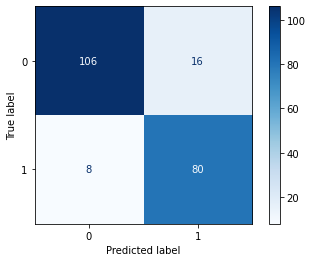

In [25]:
plot_confusion_matrix(best_logistic_regression, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

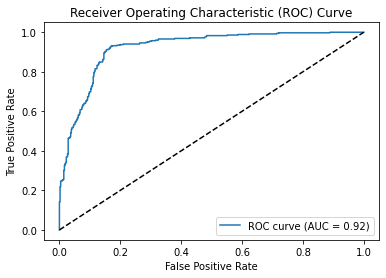

In [75]:
y_scores = best_logistic_regression.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [76]:
auc

0.9214512018331462

## Naive Bayes

In [32]:
# Define the parameter grid for grid search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Create the Naive Bayes classifier
naive_bayes = GaussianNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(naive_bayes, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
nb_best_params = grid_search.best_params_
nb_best_score = grid_search.best_score_

print("Best Hyperparameters:", nb_best_params)
print("Best Score:", nb_best_score)

# Fit the model with the best hyperparameters using the training set
best_naive_bayes = GaussianNB(**nb_best_params)
best_naive_bayes.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_naive_bayes.predict(X_test)

print("Test Accuracy:", best_naive_bayes.score(X_test, y_test))

Best Hyperparameters: {'var_smoothing': 1e-07}
Best Score: 0.8453917050691244
Test Accuracy: 0.8761904761904762


In [65]:
model=best_naive_bayes
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

0.8633879781420765
              precision    recall  f1-score   support

           0      0.922     0.869     0.895       122
           1      0.832     0.898     0.863        88

    accuracy                          0.881       210
   macro avg      0.877     0.883     0.879       210
weighted avg      0.884     0.881     0.881       210



C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


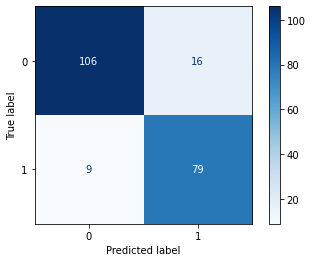

In [34]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_naive_bayes, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

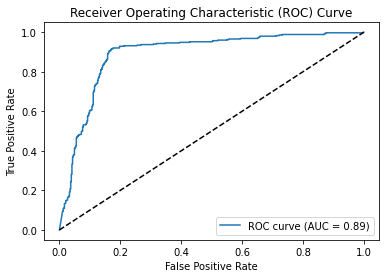

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = best_naive_bayes.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
auc

0.8903736438458661

## Support Vector Machine

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.8577570921985815


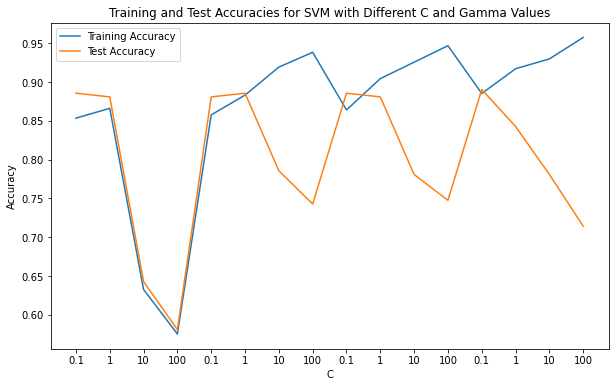

In [9]:
# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf']}

# Create the SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
svm_best_params = grid_search.best_params_
svm_best_score = grid_search.best_score_

print("Best Hyperparameters:", svm_best_params)
print("Best Score:", svm_best_score)

# Initialize lists to store training and test accuracies
training_accuracy = []
test_accuracy = []

# Iterate over different values of C
for C in param_grid['C']:
    # Iterate over different values of gamma
    for gamma in param_grid['gamma']:
        # Create an SVM classifier with current hyperparameters
        svm = SVC(C=C, gamma=gamma, kernel='rbf', probability=True)

        # Fit the model on the training set
        svm.fit(X_train, y_train)

        # Record training set accuracy
        training_accuracy.append(svm.score(X_train, y_train))

        # Record test set accuracy
        test_accuracy.append(svm.score(X_test, y_test))

best_svm = SVC(**svm_best_params, probability=True)
        
# Plot the training and test accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(len(training_accuracy)), training_accuracy, label="Training Accuracy")
plt.plot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")
plt.xticks(range(len(param_grid['C']) * len(param_grid['gamma'])), param_grid['C'] * len(param_grid['gamma']))
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracies for SVM with Different C and Gamma Values")
plt.legend()
plt.show()

In [66]:
# Fit the model with the best hyperparameters using the training set

best_svm.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_svm.predict(X_test)

print("Test Accuracy:", best_svm.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Test Accuracy: 0.8809523809523809
Classification Report:
              precision    recall  f1-score   support

           0      0.929     0.861     0.894       122
           1      0.825     0.909     0.865        88

    accuracy                          0.881       210
   macro avg      0.877     0.885     0.879       210
weighted avg      0.885     0.881     0.882       210



C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


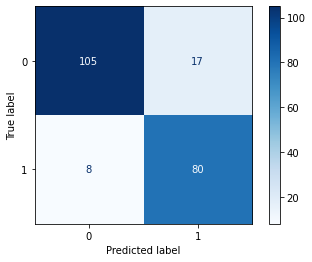

In [37]:
plot_confusion_matrix(best_svm, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

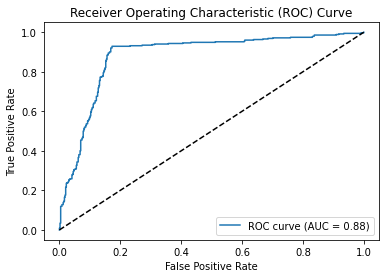

In [79]:
y_scores = best_svm.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [80]:
auc

0.8808601056864946

## Random Forest

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8616465863453817


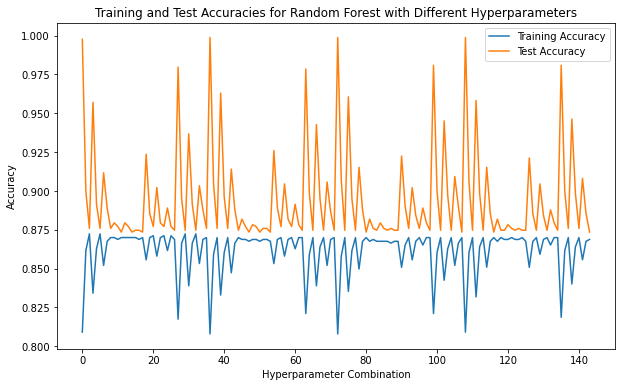

In [49]:
# Define the parameter grid for grid search
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10)
grid_search.fit(X, y)

# Get the best hyperparameters
rf_best_params = grid_search.best_params_
rf_best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Initialize lists to store training and test accuracies
training_accuracy = []
test_accuracy = []

# Iterate over different values of n_estimators
for n_estimators in param_grid['n_estimators']:
    # Iterate over different values of max_depth
    for max_depth in param_grid['max_depth']:
        # Iterate over different values of min_samples_split
        for min_samples_split in param_grid['min_samples_split']:
            # Iterate over different values of min_samples_leaf
            for min_samples_leaf in param_grid['min_samples_leaf']:
                # Create a Random Forest classifier with current hyperparameters
                rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                            random_state=0)

                # Perform 10-fold cross-validation
                scores = cross_val_score(rf, X, y, cv=10)

                # Record average training set accuracy
                training_accuracy.append(np.mean(scores))

                # Fit the model on the entire dataset
                rf.fit(X, y)

                # Record test set accuracy
                test_accuracy.append(rf.score(X, y))

best_rf = grid_search.best_estimator_

# Plot the training and test accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(len(training_accuracy)), training_accuracy, label="Training Accuracy")
plt.plot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")
plt.xlabel("Hyperparameter Combination")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracies for Random Forest with Different Hyperparameters")
plt.legend()
plt.show()

In [54]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

C:\Users\ajed8\AppData\Local\Temp\ipykernel_18344\1455457369.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  plot_tree(tree, feature_names=df.drop(['Grade'], 1).columns, filled=True, ax=ax)


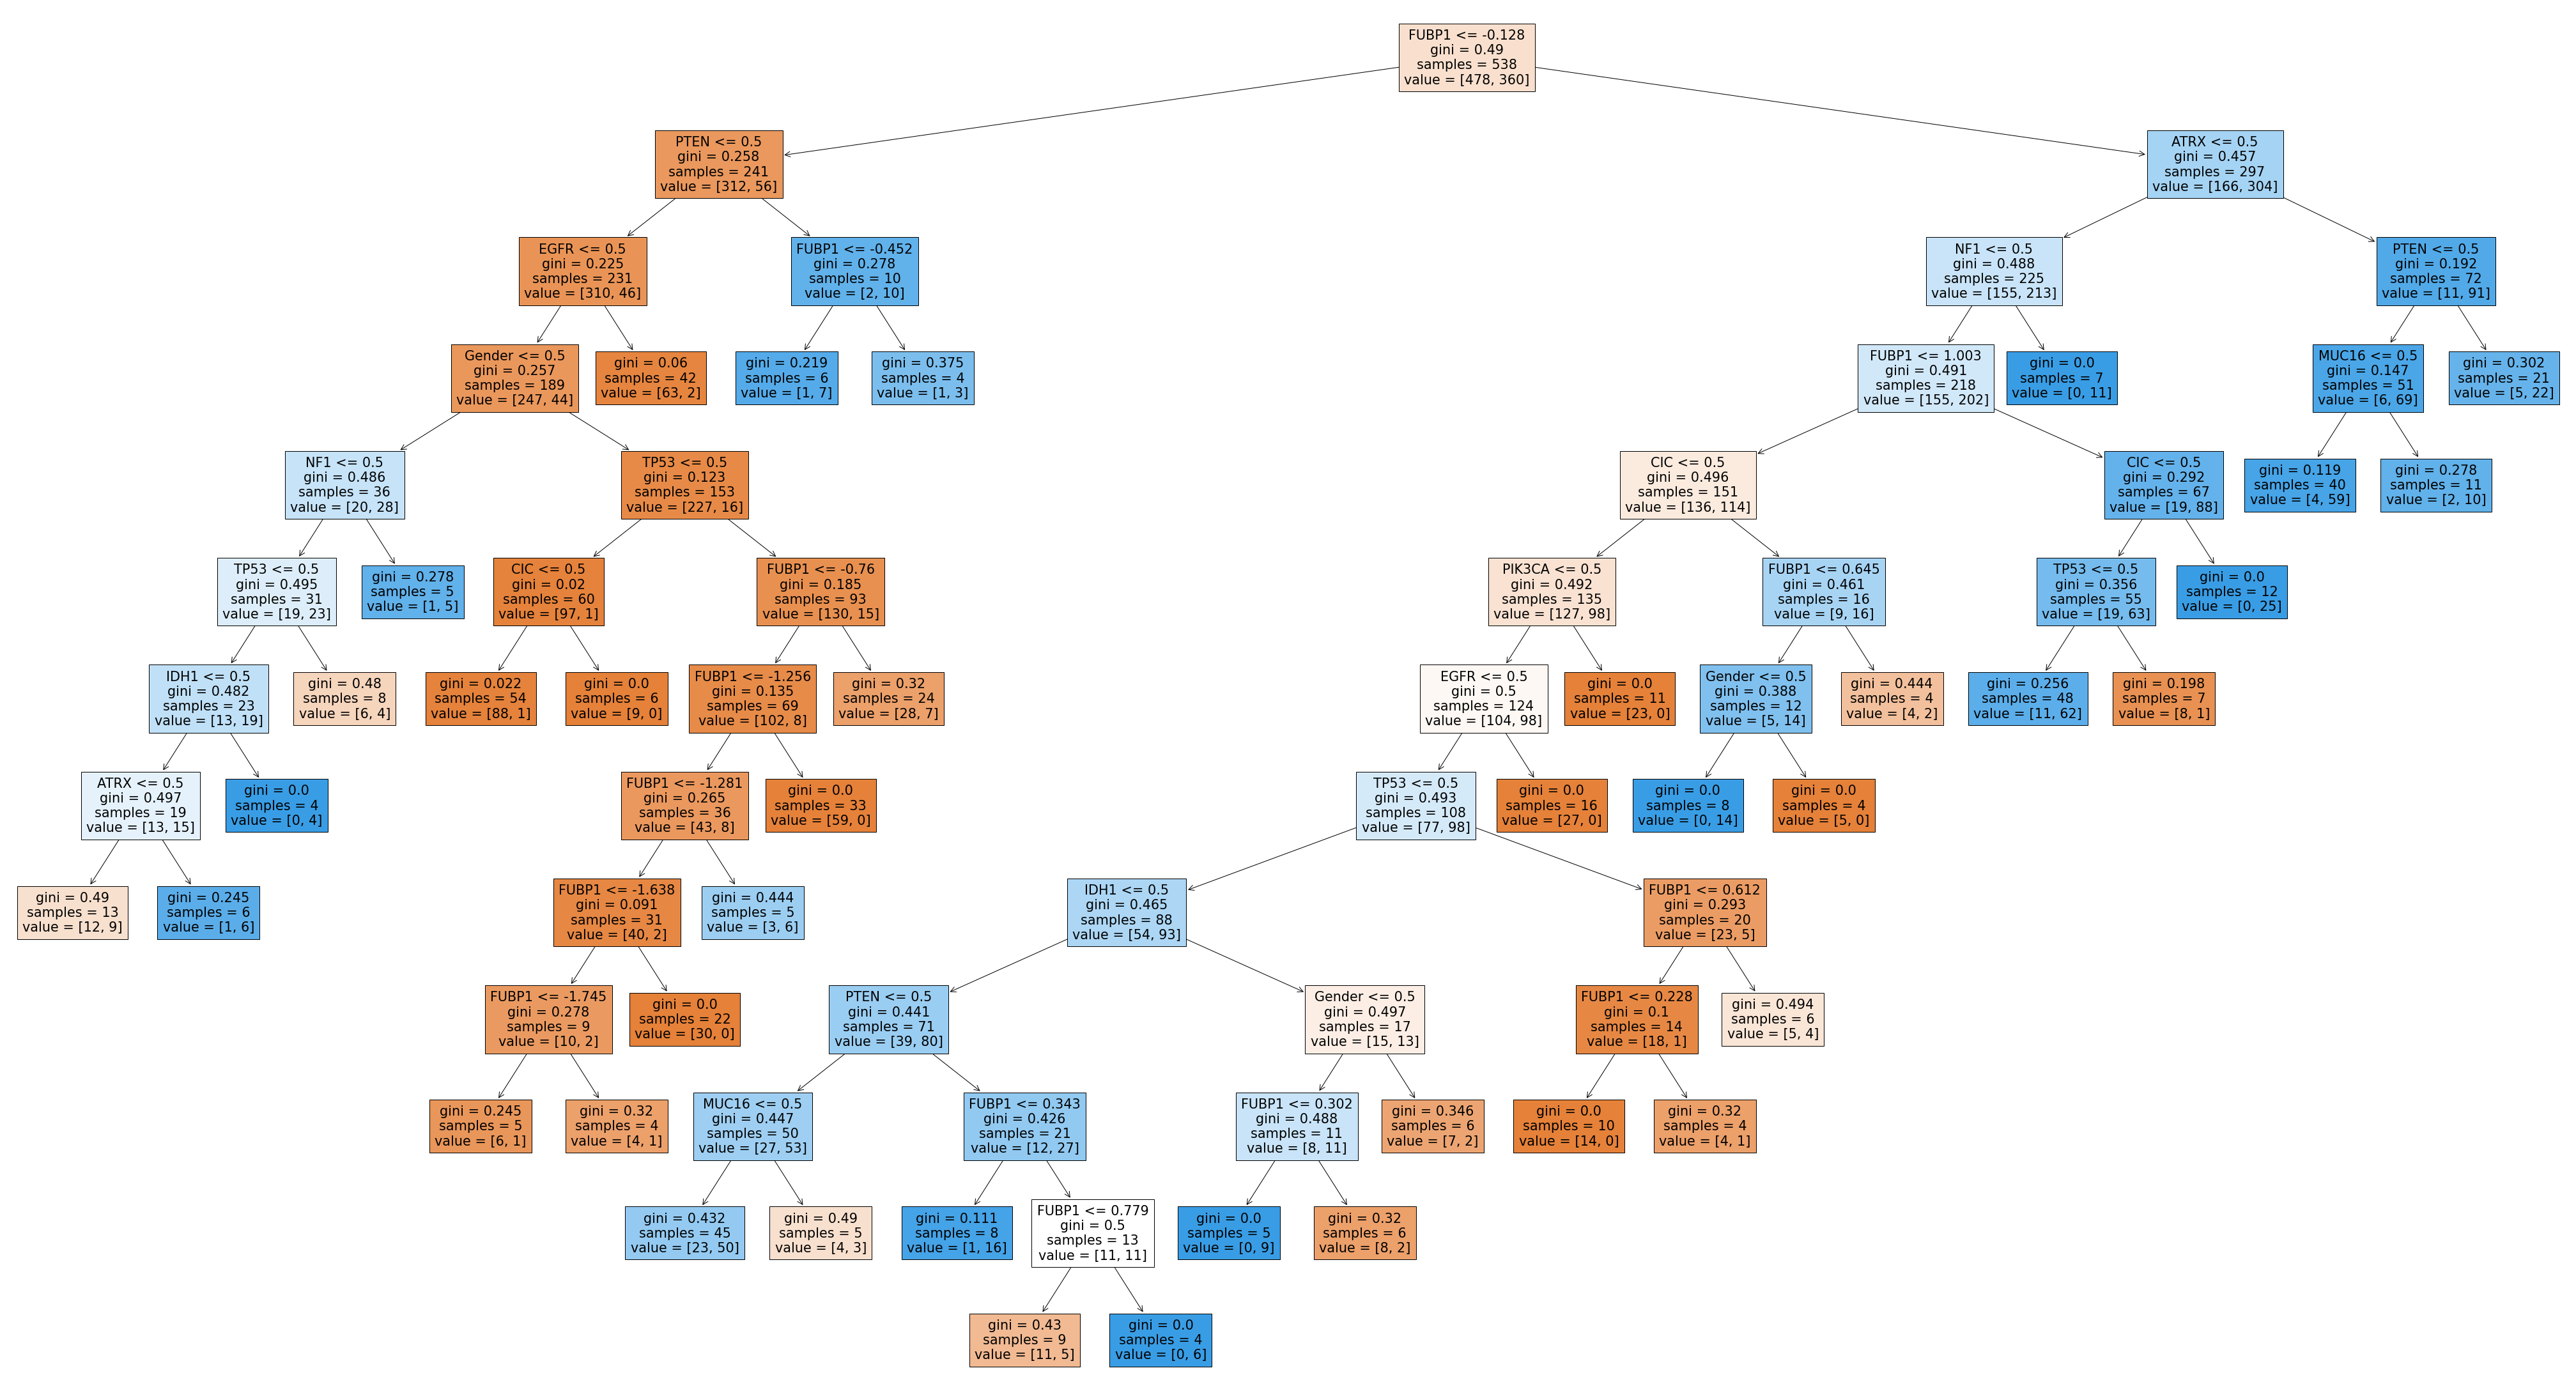

<Figure size 432x288 with 0 Axes>

In [43]:
from sklearn.tree import plot_tree

# Extract a single decision tree from the Random Forest
tree = best_rf.estimators_[0]

# Plot the decision tree in full screen
fig, ax = plt.subplots(figsize=(72, 40))
plot_tree(tree, feature_names=df.drop(['Grade'], 1).columns, filled=True, ax=ax)
plt.show()
plt.savefig("decision_tree.png")

C:\Users\ajed8\AppData\Local\Temp\ipykernel_20212\2356670153.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feature_names = df_reduced.drop(['Grade'], 1).columns


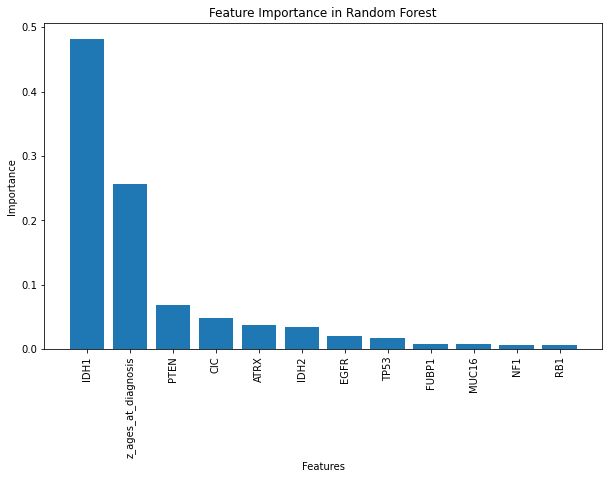

In [25]:
# Get feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature indices in descending order

# Get feature names
feature_names = df_reduced.drop(['Grade'], 1).columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

In [51]:
# Sort feature importances and feature names in descending order
indices = np.argsort(best_rf.feature_importances_)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_feature_importances = best_rf.feature_importances_[indices]

# Calculate cumulative importance
cumulative_importance = np.cumsum(sorted_feature_importances)

# Print feature names and cumulative importance scores
for feature_name, importance_score, cumulative_score in zip(sorted_feature_names, sorted_feature_importances, cumulative_importance):
    print(f"{feature_name}: Importance = {importance_score:.4f}, Cumulative Importance = {cumulative_score:.4f}")


IDH1: Importance = 0.4822, Cumulative Importance = 0.4822
z_ages_at_diagnosis: Importance = 0.2566, Cumulative Importance = 0.7388
PTEN: Importance = 0.0695, Cumulative Importance = 0.8083
CIC: Importance = 0.0486, Cumulative Importance = 0.8569
ATRX: Importance = 0.0381, Cumulative Importance = 0.8950
IDH2: Importance = 0.0349, Cumulative Importance = 0.9299
EGFR: Importance = 0.0213, Cumulative Importance = 0.9512
TP53: Importance = 0.0179, Cumulative Importance = 0.9691
FUBP1: Importance = 0.0086, Cumulative Importance = 0.9777
MUC16: Importance = 0.0082, Cumulative Importance = 0.9858
NF1: Importance = 0.0074, Cumulative Importance = 0.9932
RB1: Importance = 0.0068, Cumulative Importance = 1.0000


In [67]:
# Create a Random Forest classifier
best_rf.fit(X_train, y_train)


# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)

print("Test Accuracy:", best_rf.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Test Accuracy: 0.8857142857142857
Classification Report:
              precision    recall  f1-score   support

           0      0.922     0.877     0.899       122
           1      0.840     0.898     0.868        88

    accuracy                          0.886       210
   macro avg      0.881     0.887     0.884       210
weighted avg      0.888     0.886     0.886       210



C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


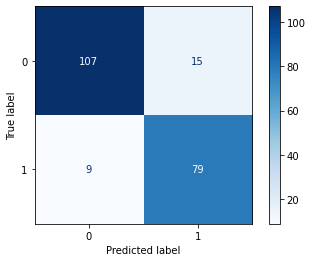

In [53]:
plot_confusion_matrix(best_rf, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

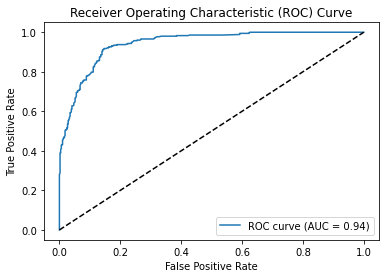

In [82]:
y_scores = best_rf.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [83]:
auc

0.9421383978675644

## Decision Tree (for Ada)

In [12]:
from sklearn.tree import DecisionTreeClassifier


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=10)
grid_search.fit(X, y)

# Get the best parameters and the best score
best_dt_params = grid_search.best_params_
best_dt_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_dt_params)
print("Best Score:", best_dt_score)

# Create a new Decision Tree classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Perform cross-validation with the best classifier
cv_scores = cross_val_score(best_dt, X, y, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8616465863453817
Cross-Validation Scores: [0.85714286 0.85714286 0.86904762 0.8452381  0.89285714 0.82142857
 0.8452381  0.85714286 0.86746988 0.91566265]
Mean CV Score: 0.8628370625358578


In [68]:
from sklearn.metrics import f1_score, classification_report
model=best_dt
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

0.8556149732620321
              precision    recall  f1-score   support

           0      0.928     0.844     0.884       122
           1      0.808     0.909     0.856        88

    accuracy                          0.871       210
   macro avg      0.868     0.877     0.870       210
weighted avg      0.878     0.871     0.872       210



C:\Users\ajed8\AppData\Local\Temp\ipykernel_18936\2605748169.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_reduced.drop(['Grade'], 1))
C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


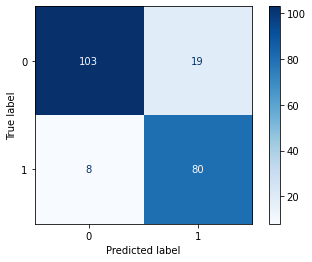

In [14]:
from sklearn.metrics import plot_confusion_matrix
X = np.array(df_reduced.drop(['Grade'], 1))
y = np.array(df_reduced['Grade'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


plot_confusion_matrix(best_dt, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

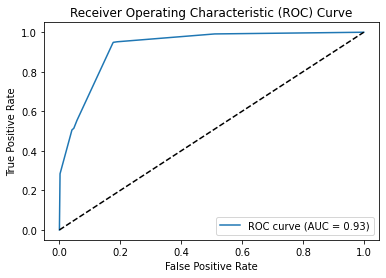

In [17]:
y_scores = best_dt.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Adaboost (DT base model)

Cross-validation scores: [0.79761905 0.82142857 0.85714286 0.73809524 0.78571429 0.80952381
 0.83333333 0.85714286 0.81927711 0.86746988]
Mean CV score: 0.8186746987951807


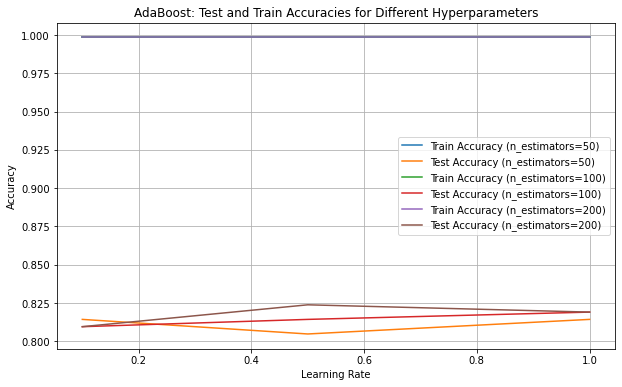

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 200}


In [57]:
# Define the base estimator for AdaBoost
base_estimator = best_dt

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=base_estimator)

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=10)
grid_search.fit(X, y)

# Get the best hyperparameters
ada_best_params = grid_search.best_params_

# Create the AdaBoost classifier with the best hyperparameters
adaboost = AdaBoostClassifier(base_estimator=base_estimator, **ada_best_params)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(adaboost, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# Initialize lists to store training and test accuracies
train_accuracy = []
test_accuracy = []

# Try different hyperparameters
n_estimators_values = [50, 100, 200]
learning_rate_values = [0.1, 0.5, 1.0]

# Iterate over different hyperparameters
for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        # Create the AdaBoost classifier with the current hyperparameters
        adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate)
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
        
        # Fit the AdaBoost classifier to the training set
        adaboost.fit(X_train, y_train)
        
        # Record training set accuracy
        train_accuracy.append(adaboost.score(X_train, y_train))
        
        # Record test set accuracy
        test_accuracy.append(adaboost.score(X_test, y_test))

# Reshape the accuracy lists for plotting
train_accuracy = np.array(train_accuracy).reshape(len(n_estimators_values), len(learning_rate_values))
test_accuracy = np.array(test_accuracy).reshape(len(n_estimators_values), len(learning_rate_values))

# Plot the test and train accuracies
plt.figure(figsize=(10, 6))
for i, n_estimators in enumerate(n_estimators_values):
    plt.plot(learning_rate_values, train_accuracy[i], label=f"Train Accuracy (n_estimators={n_estimators})")
    plt.plot(learning_rate_values, test_accuracy[i], label=f"Test Accuracy (n_estimators={n_estimators})")

plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("AdaBoost: Test and Train Accuracies for Different Hyperparameters")
plt.legend()
plt.grid(True)
plt.show()

# Print the best parameters
print("Best Parameters:", ada_best_params)


C:\Users\ajed8\AppData\Local\Temp\ipykernel_18936\2328278843.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_reduced.drop(['Grade'], 1))
C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


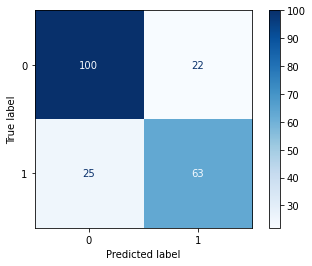

In [84]:
X = np.array(df_reduced.drop(['Grade'], 1))
y = np.array(df_reduced['Grade'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


plot_confusion_matrix(adaboost, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [85]:
model=adaboost
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

0.788235294117647
              precision    recall  f1-score   support

           0      0.836     0.877     0.856       122
           1      0.817     0.761     0.788        88

    accuracy                          0.829       210
   macro avg      0.827     0.819     0.822       210
weighted avg      0.828     0.829     0.828       210



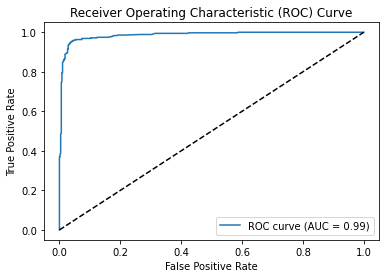

In [86]:
y_scores = adaboost.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [87]:
auc

0.9856230125327347

## Ensemble

In [34]:
knn = best_knn
nb = best_naive_bayes
lr = best_logistic_regression
svm = best_svm
#rf = best_rf
ada = adaboost

In [88]:
eclf = VotingClassifier(estimators=[('KNN', knn), ('NB', nb),
                                    ('LR', lr), ('SVM', svm), ('Ada', ada)],
                        voting='hard')

eclf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = eclf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, digits=3)

print(report)

              precision    recall  f1-score   support

           0      0.923     0.885     0.904       122
           1      0.849     0.898     0.873        88

    accuracy                          0.890       210
   macro avg      0.886     0.891     0.888       210
weighted avg      0.892     0.890     0.891       210



In [89]:
print("Test Accuracy:", eclf.score(X_test, y_test))

Test Accuracy: 0.8904761904761904


In [46]:
from numpy import mean
from numpy import std

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, error_score='raise')
    return scores

def get_models(X, y):
    models = dict()
    models['KNN'] = knn
    models['NB'] = nb
    models['LR'] = lr
    models['SVM'] = svm
    #models['RF'] = rf
    models['Ada'] = ada

    models['soft_voting'] = get_voting(X, y)
    return models


def get_voting(X, y):
    models = list()
    models.append(('KNN', knn))
    models.append(('NB', nb))
    models.append(('LR', lr))
    models.append(('SVM', svm))
    #models.append(('RF', rf))
    models.append(('Ada', ada))

    # compute model accuracies using cross-validation
    accuracies = {}
    for name, model in models:
        scores = evaluate_model(model, X, y)
        accuracies[name] = mean(scores)

    # compute model weights based on accuracies
    weights = {}
    total_acc = sum(accuracies.values())
    for name, acc in accuracies.items():
        weights[name] = acc / total_acc

    # define the voting ensemble with dynamic weights
    ensemble = VotingClassifier(estimators=models, voting='soft', weights=list(weights.values()))
    return ensemble

>KNN 0.870 (0.032)
>NB 0.864 (0.037)
>LR 0.869 (0.029)
>SVM 0.869 (0.035)
>Ada 0.810 (0.038)
>soft_voting 0.869 (0.038)


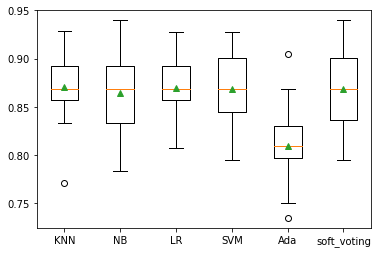

>soft_voting_dynamic_weights 0.869 (0.038)


In [38]:
# get the models to evaluate
models = get_models(X, y)

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# compare model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# evaluate the soft voting ensemble with dynamic weights
ensemble = models['soft_voting']
scores = evaluate_model(ensemble, X, y)
print('>soft_voting_dynamic_weights %.3f (%.3f)' % (mean(scores), std(scores)))


In [39]:
# fit the soft voting ensemble with dynamic weights
ensemble = get_voting(X, y)
ensemble.fit(X, y)
print(ensemble.weights)

[0.20332258864368957, 0.2018415638549534, 0.2030444776539495, 0.20295624163712436, 0.1888351282102832]


In [90]:
ensemble.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = ensemble.predict(X_test)

print("Test Accuracy:", ensemble.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Test Accuracy: 0.8857142857142857
Classification Report:
              precision    recall  f1-score   support

           0      0.922     0.877     0.899       122
           1      0.840     0.898     0.868        88

    accuracy                          0.886       210
   macro avg      0.881     0.887     0.884       210
weighted avg      0.888     0.886     0.886       210



C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


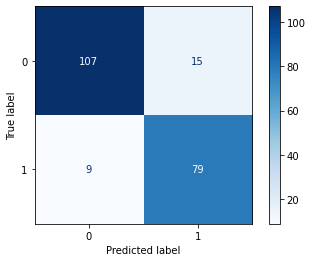

In [91]:
plot_confusion_matrix(ensemble, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

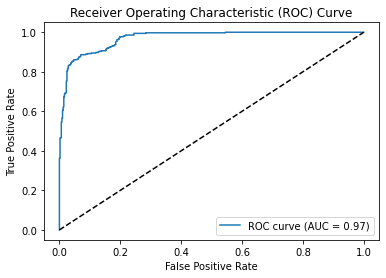

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = ensemble.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [93]:
print(auc)

0.9699629395809951


In [47]:
def get_model_hyperparameters(model):
    hyperparameters = {}

    # Retrieve all parameters of the model
    model_params = model.get_params()

    # Filter out non-hyperparameters
    for param, value in model_params.items():
        if isinstance(value, (int, float, str, bool)) or value is None:
            hyperparameters[param] = value

    return hyperparameters

# Get the hyperparameters for each model
model_hyperparameters = {}
for name, model in models.items():
    model_hyperparameters[name] = get_model_hyperparameters(model)

# Print the hyperparameters for each model
for name, hyperparameters in model_hyperparameters.items():
    print(f"Hyperparameters for {name}:")
    if hyperparameters:
        for param, value in hyperparameters.items():
            print(f"{param}: {value}")
    else:
        print("No hyperparameters found.")
    print()


Hyperparameters for KNN:
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 9
p: 1
weights: uniform

Hyperparameters for NB:
priors: None
var_smoothing: 1e-07

Hyperparameters for LR:
C: 100
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False

Hyperparameters for SVM:
C: 1
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: 0.1
kernel: linear
max_iter: -1
probability: True
random_state: None
shrinking: True
tol: 0.001
verbose: False

Hyperparameters for Ada:
algorithm: SAMME.R
base_estimator__ccp_alpha: 0.0
base_estimator__class_weight: None
base_estimator__criterion: entropy
base_estimator__max_depth: 5
base_estimator__max_features: None
base_estimator__max_leaf_nodes: None
base_estimator__min_impurity_decrease: 0.0
base_e